## Updated Version

In [1]:
# import python libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
from nltk.stem import SnowballStemmer 
import seaborn as sns
import matplotlib.pyplot as plt

# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import stopwords  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,confusion_matrix

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [3]:
df = pd.read_csv('Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568452 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568452 non-null int64
ProductId                 568452 non-null object
UserId                    568452 non-null object
ProfileName               568436 non-null object
HelpfulnessNumerator      568452 non-null int64
HelpfulnessDenominator    568452 non-null int64
Score                     568452 non-null int64
Time                      568452 non-null int64
Summary                   568425 non-null object
Text                      568452 non-null object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [7]:
df.shape

(568452, 10)

In [8]:
df.nunique()

Id                        568452
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295741
Text                      393577
dtype: int64

In [9]:
# rename columns
df.columns = ["Id", "ProductId", "UserId", "ProfileName", "VotesHelpful",
              "VotesTotal", "Score", "Time", "Summary", "Text"]

In [10]:
def score_sentiment(score):
    # Replace scores of 1,2 with negative and 4,5 with positive
    if(score < 3):
        return 0
    else:
        return 1
df["Sentiment"] = df.Score.apply(score_sentiment)   

In [11]:
df1 = df
df1["Sentiment"].value_counts()

1    486415
0     82037
Name: Sentiment, dtype: int64

In [12]:
import re
from nltk.stem import SnowballStemmer 
snow = SnowballStemmer('english') 

def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower() # lower case
    sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r' ',sentence) # replace these punctuation with space
    tokens = sentence.split()
    out = []
    for t in tokens:
        out.append(snow.stem(t))
    out = " ".join(out)
    out = re.sub(r'[\'|"|#]', r'', out) # remove these punctuation
    return out    

In [13]:
df1["Cleaned_text"] = df1['Text'].apply(cleanup)
df1["Cleaned_text"].head()

0    i have bought sever of the vital can dog food product and have found them all to be of good qual...
1    product arriv label as jumbo salt peanut the peanut were actual small size unsalt not sure if th...
2    this is a confect that has been around a few centuri it is a light pillowi citrus gelatin with n...
3    if you are look for the secret ingredi in robitussin i believ i have found it i got this in addi...
4    great taffi at a great price there was a wide assort of yummi taffi deliveri was veri quick if y...
Name: Cleaned_text, dtype: object

Text(0.5, 1.0, 'Bar plot of sentiments')

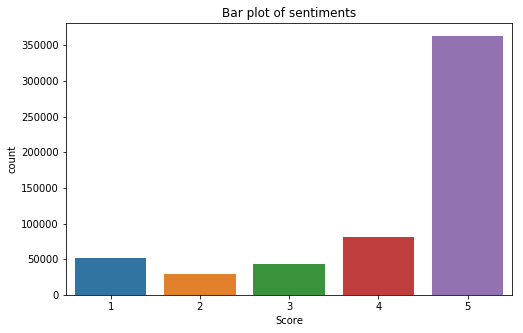

In [14]:
plt.figure(figsize = (8,5))
sns.countplot(df['Score'])
plt.title("Bar plot of sentiments")

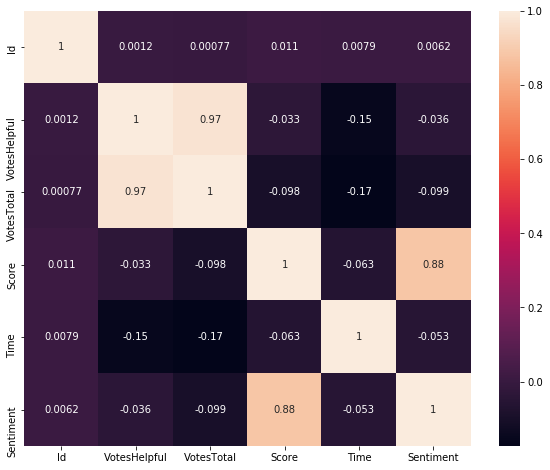

In [15]:
# set figure size
plt.figure(figsize=(10,8))
# give corr value to co
co = df.corr()
# use seaborn to generate heatmap
sns.heatmap(co, annot=True)

In [16]:
df1[df1['Score']==5][['Summary','Cleaned_text','Sentiment']].head(5)

,Summary,Cleaned_text,Sentiment
0,Good Quality Dog Food,i have bought sever of the vital can dog food product and have found them all to be of good qual...,1
4,Great taffy,great taffi at a great price there was a wide assort of yummi taffi deliveri was veri quick if y...,1
6,Great! Just as good as the expensive brands!,this saltwat taffi had great flavor and was veri soft and chewi each candi was individu wrap wel...,1
7,"Wonderful, tasty taffy",this taffi is so good it is veri soft and chewi the flavor are amaz i would definit recommend yo...,1
8,Yay Barley,right now im most just sprout this so my cat can eat the grass they love it i rotat it around wi...,1


In [17]:
df1[df1['Score']==1][['Summary','Cleaned_text','Sentiment']].head(5)

,Summary,Cleaned_text,Sentiment
1,Not as Advertised,product arriv label as jumbo salt peanut the peanut were actual small size unsalt not sure if th...,0
12,My Cats Are Not Fans of the New Food,my cat have been happili eat felida platinum for more than two year i just got a new bag and the...,0
26,Nasty No flavor,the candi is just red no flavor just plan and chewi i would never buy them again,0
50,Don't like it,this oatmeal is not good it mushi soft i dont like it quaker oat is the way to go,0
62,stale product.,arriv in 6 day and were so stale i could not eat ani of the 6 bag,0


In [18]:
X = df1['Cleaned_text'].values
y = df1['Sentiment'].values

In [19]:
# split training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### LogisticRegression L1

AUC score 0.938
Accuracy: 0.916
Precision: 0.93
Recall: 0.975
F1-Score: 0.952
Confusion Matrix:


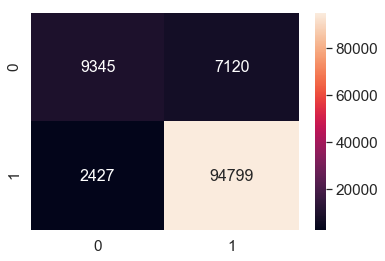

In [20]:
# Logistic regression L1 on Unique gram

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


uni = CountVectorizer(min_df = 5)
new_train = uni.fit_transform(X_train)
new_test = uni.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l1',solver='liblinear',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.963
Accuracy: 0.936
Precision: 0.949
Recall: 0.978
F1-Score: 0.963
Confusion Matrix:


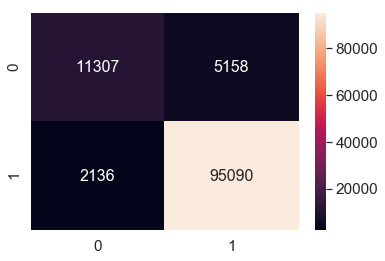

In [21]:
# Logistic regression L1 on Bi-gram

ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


uni = CountVectorizer(ngram_range=(1,2),min_df = 5)
new_train = uni.fit_transform(X_train)
new_test = uni.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l1',solver='liblinear',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.952
Accuracy: 0.928
Precision: 0.948
Recall: 0.97
F1-Score: 0.959
Confusion Matrix:


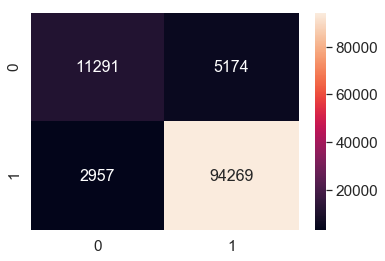

In [22]:
# Logistic regression model on TF-IDF

ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


tfidf = TfidfVectorizer()
new_train = tfidf.fit_transform(X_train)
new_test = tfidf.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l1',solver='liblinear',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.976
Accuracy: 0.954
Precision: 0.97
Recall: 0.976
F1-Score: 0.973
Confusion Matrix:


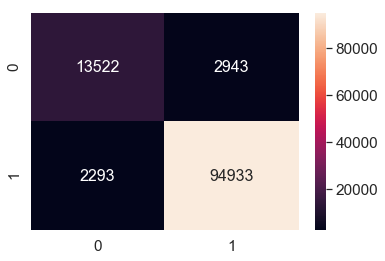

In [23]:
#Logistic regression model on TFIDF + ngram

ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


tfidf_n = TfidfVectorizer(ngram_range=(1,2))
new_train = tfidf_n.fit_transform(X_train)
new_test = tfidf_n.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l1',solver='liblinear',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### LogisticRegression L2

AUC score 0.938
Accuracy: 0.918
Precision: 0.934
Recall: 0.973
F1-Score: 0.953
Confusion Matrix:


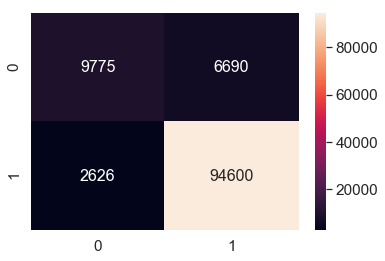

In [24]:
# LogisticRegression on Uni-gram 

ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


uni = CountVectorizer(min_df = 5)
new_train = uni.fit_transform(X_train)
new_test = uni.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l2',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.971
Accuracy: 0.948
Precision: 0.961
Recall: 0.979
F1-Score: 0.97
Confusion Matrix:


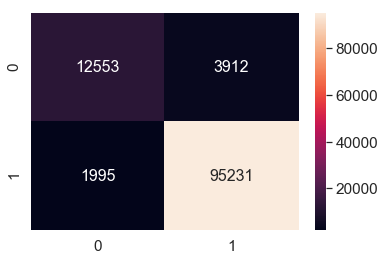

In [25]:
# LogisticRegression on Bi-gram 

ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


uni = CountVectorizer(ngram_range=(1,2),min_df = 5)
new_train = uni.fit_transform(X_train)
new_test = uni.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l2',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.953
Accuracy: 0.926
Precision: 0.944
Recall: 0.971
F1-Score: 0.958
Confusion Matrix:


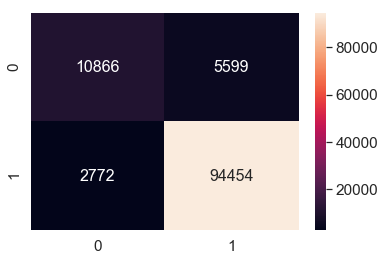

In [26]:
# Logistic regression model on TF-IDF

ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


tfidf = TfidfVectorizer()
new_train = tfidf.fit_transform(X_train)
new_test = tfidf.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l2',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.98
Accuracy: 0.954
Precision: 0.965
Recall: 0.981
F1-Score: 0.973
Confusion Matrix:


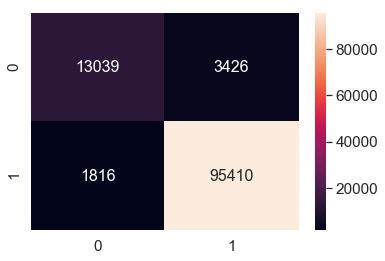

In [27]:
#Logistic regression model on TFIDF + ngram

ml = LogisticRegression()
param= {'C':[10**2,10,1,10**-1,10**-2,10**-3]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


tfidf_n = TfidfVectorizer(ngram_range=(1,2))
new_train = tfidf_n.fit_transform(X_train)
new_test = tfidf_n.transform(X_test)

gridSearch.fit(new_train,y_train)
optimal_C = gridSearch.best_params_['C']

ml = LogisticRegression(penalty='l2',C = optimal_C)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### RandomForest

AUC score 0.912
Accuracy: 0.857
Precision: 0.857
Recall: 1.0
F1-Score: 0.923
Confusion Matrix:


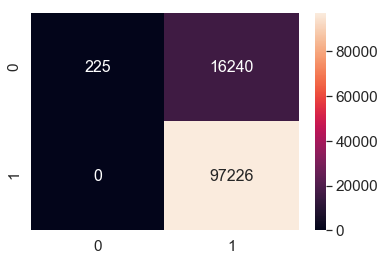

In [28]:
# RandomForest on Uni-gram with stop_words

ml = RandomForestClassifier()
param= {'max_depth': [8,16,20,26], 'n_estimators': [40,90,120,200]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)

model = CountVectorizer(stop_words = 'english')   
new_train = model.fit_transform(X_train)
new_test = model.transform(X_test)

gridSearch.fit(new_train,y_train)
max_depth = gridSearch.best_params_['max_depth']
n_estimators = gridSearch.best_params_['n_estimators']
ml = RandomForestClassifier(max_depth = max_depth,n_estimators = n_estimators)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.908
Accuracy: 0.856
Precision: 0.856
Recall: 1.0
F1-Score: 0.922
Confusion Matrix:


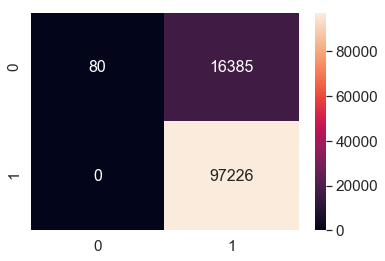

In [29]:
# RandomForest with bi-gram with stop_words

ml = RandomForestClassifier()
param= {'max_depth': [8,16,20,26], 'n_estimators': [40,90,120,200]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


model = CountVectorizer(ngram_range=(1,2),stop_words = 'english')   
new_train = model.fit_transform(X_train)
new_test = model.transform(X_test)

gridSearch.fit(new_train,y_train)
max_depth = gridSearch.best_params_['max_depth']
n_estimators = gridSearch.best_params_['n_estimators']
ml = RandomForestClassifier(max_depth = max_depth,n_estimators = n_estimators)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.922
Accuracy: 0.856
Precision: 0.856
Recall: 1.0
F1-Score: 0.922
Confusion Matrix:


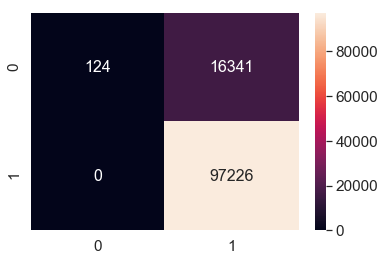

In [30]:
# RandomForest model on TFIDF with stop words

ml = RandomForestClassifier()
param= {'max_depth': [8,16,20,26], 'n_estimators': [40,90,120,200]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


tfidf = TfidfVectorizer(stop_words = 'english')   
new_train = tfidf.fit_transform(X_train)
new_test = tfidf.transform(X_test)

gridSearch.fit(new_train,y_train)
max_depth = gridSearch.best_params_['max_depth']
n_estimators = gridSearch.best_params_['n_estimators']
ml = RandomForestClassifier(max_depth = max_depth,n_estimators = n_estimators)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

AUC score 0.91
Accuracy: 0.856
Precision: 0.856
Recall: 1.0
F1-Score: 0.922
Confusion Matrix:


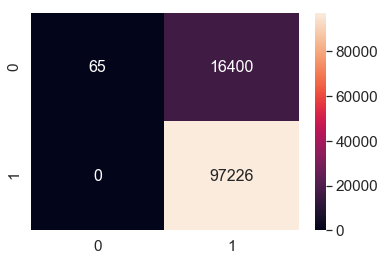

In [31]:
#RandomForest model on TFIDF + ngram with stopword

ml = RandomForestClassifier()
param= {'max_depth': [8,16,20,26], 'n_estimators': [40,90,120,200]}
gridSearch= GridSearchCV(ml,param,cv=10,scoring='roc_auc',n_jobs=-1)


tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')   
new_train = tfidf_n.fit_transform(X_train)
new_test = tfidf_n.transform(X_test)

gridSearch.fit(new_train,y_train)
max_depth = gridSearch.best_params_['max_depth']
n_estimators = gridSearch.best_params_['n_estimators']
ml = RandomForestClassifier(max_depth = max_depth,n_estimators = n_estimators)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))

print("Confusion Matrix:")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### KNeighbors

In [39]:
# KNeighbors model with Uni-gram 
c = CountVectorizer()  
new_train = c.fit_transform(X_train)
new_test = c.transform(X_test)

# Find optimal k
myList = list(range(0,30))
nb = list(filter(lambda x: x % 2 != 0, myList))
result=[]
for i in nb:
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    Knn.fit(new_train,y_train )
    pred = Knn.predict(new_test)
    score = f1_score(y_test, pred)
    result.append(score)
    
MSE = [1 - x for x in result]
optimal_k = nb[MSE.index(min(MSE))]

ml = KNeighborsClassifier(optimal_k)
re = ml.fit(new_train, y_train)
y_pred = re.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))


AUC score 0.712
Accuracy: 0.854
Precision: 0.858
Recall: 0.992
F1-Score: 0.92


In [40]:
# KNeighbors model on Bi-gram 
c = CountVectorizer(ngram_range=(1,2)) 
new_train = c.fit_transform(X_train)
new_test = c.transform(X_test)

# Find optimal k
myList = list(range(0,30))
nb = list(filter(lambda x: x % 2 != 0, myList))
result=[]
for i in nb:
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    Knn.fit(new_train,y_train )
    pred = Knn.predict(new_test)
    score = f1_score(y_test, pred)
    result.append(score)
    
MSE = [1 - x for x in result]
optimal_k = nb[MSE.index(min(MSE))]

ml = KNeighborsClassifier(optimal_k)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))


AUC score 0.724
Accuracy: 0.85
Precision: 0.851
Recall: 0.998
F1-Score: 0.919


In [41]:
# KNeighbors model on TFIDF 

tfidf = TfidfVectorizer() 
new_train = tfidf.fit_transform(X_train)
new_test = tfidf.transform(X_test)

# Find optimal k
myList = list(range(0,30))
nb = list(filter(lambda x: x % 2 != 0, myList))
result=[]
for i in nb:
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    Knn.fit(new_train,y_train )
    pred = Knn.predict(new_test)
    score = f1_score(y_test, pred)
    result.append(score)
    
MSE = [1 - x for x in result]
optimal_k = nb[MSE.index(min(MSE))]

ml = KNeighborsClassifier(optimal_k)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))


AUC score 0.79
Accuracy: 0.863
Precision: 0.865
Recall: 0.993
F1-Score: 0.925


In [42]:
#KNeighbors model on TFIDF + ngram

tfidf_n = TfidfVectorizer(ngram_range=(1,2))
new_train = tfidf_n.fit_transform(X_train)
new_test = tfidf_n.transform(X_test)

# Find optimal k
myList = list(range(0,30))
nb = list(filter(lambda x: x % 2 != 0, myList))
result=[]
for i in nb:
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    Knn.fit(new_train,y_train )
    pred = Knn.predict(new_test)
    score = f1_score(y_test, pred)
    result.append(score)
    
MSE = [1 - x for x in result]
optimal_k = nb[MSE.index(min(MSE))]

ml = KNeighborsClassifier(optimal_k)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))


AUC score 0.824
Accuracy: 0.867
Precision: 0.869
Recall: 0.993
F1-Score: 0.927


### Naive bayes MultinomialNB

In [43]:
#MultinomialNB model on unigram
c = CountVectorizer()
new_train = c.fit_transform(X_train)
new_test = c.transform(X_test)
alpha_values = np.linspace(0.000001,1,50)
result=[]
# Find optimal alpha
for alpha in alpha_values:
    mnb = MultinomialNB(alpha = alpha)
    scores = cross_val_score(mnb, new_train, y_train, cv = 10, scoring = 'roc_auc')
    result.append(scores.mean())
optimal_alpha = alpha_values[result.index(max(result))]

ml = MultinomialNB(optimal_alpha)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))


AUC score 0.9
Accuracy: 0.889
Precision: 0.937
Recall: 0.931
F1-Score: 0.934


In [44]:
#MultinomialNB model with Bi-gram

c = CountVectorizer(ngram_range=(1,2))
new_train = c.fit_transform(X_train)
new_test = c.transform(X_test)
alpha_values = np.linspace(0.000001,1,50)
result=[]
# Find optimal alpha
for alpha in alpha_values:
    mnb = MultinomialNB(alpha = alpha)
    scores = cross_val_score(mnb, new_train, y_train, cv = 10, scoring = 'roc_auc')
    result.append(scores.mean())
optimal_alpha = alpha_values[result.index(max(result))]

ml = MultinomialNB(optimal_alpha)
result = ml.fit(new_train, y_train)
y_pred = result.predict(new_test)

auc=roc_auc_score(y_test, ml.predict_proba(new_test)[:,1])
print("AUC score",round(auc,3))
print("Accuracy:",round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test, y_pred),3))
print("Recall:",round(recall_score(y_test, y_pred),3))
print("F1-Score:",round(f1_score(y_test, y_pred),3))


AUC score 0.907
Accuracy: 0.916
Precision: 0.938
Recall: 0.964
F1-Score: 0.951


## Conclusion
The best model in this case is Logistic Regression L2 on Bi-gram + TFIDF model, the accuracy score is 95.4%, AUC score is 98%, f1 score is 97.3%